# Overview

This is the final script of the final project for Civic Analytics at NYC CUSP. It includes the following sections:

- Data Ingestion and Processing
- Modelling
- Data Exporting
- Analysis and Visualization

Contributor
- Ian Xiao
- Ben Steers
- Te Du

---

## Data Ingestion and Processing

In [1]:
# Import
import pandas as pd
import numpy as np
import matplotlib as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing
import warnings
import matplotlib.style as style
import statsmodels.api as sm
import statsmodels.formula.api as smf
from IPython.display import HTML, display as d
from IPython.core.magic import register_cell_magic
from datetime import datetime
warnings.filterwarnings('ignore')
style.use('fivethirtyeight')
%pylab inline
pd.set_option('display.max_columns', 500)

//anaconda/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Populating the interactive namespace from numpy and matplotlib


In [2]:
# Ingest data from project github
# Please see Data Processing script for detailed steps (TO BE UPLOADED)
url = "https://raw.githubusercontent.com/td928/CAUI_team1_Final_Project/master/merged-w-latlon.csv"
df = pd.read_csv(url)

In [3]:
# Create a Age feature based on Built Year
df["age"] = datetime.datetime.now().year - df['YearBuilt']

# Create Average EUI of 2013, 2014, and 2015
df['EUI_2013'] = pd.to_numeric(df['EUI_2013'], errors='coerce')
df['EUI_2014'] = pd.to_numeric(df['EUI_2014'], errors='coerce')
df['EUI_2015'] = pd.to_numeric(df['EUI_2015'], errors='coerce')
df["avgEUI"] = (df['EUI_2013']+df['EUI_2014']+df['EUI_2015'])/3

df.head(10)

,BBL,EUI_2013,floorArea_2013,EUI_2014,floorArea_2014,EUI_2015,floorArea_2015,EUI_2016,floorArea_2016,TYPE_2016,Borough,LotArea,BldgArea,ComArea,ResArea,OfficeArea,RetailArea,NumFloors,UnitsRes,UnitsTotal,YearBuilt,XCoord,YCoord,ZipCode,Address,Latitude,Longitude,age,avgEUI
0,1000010010,NaN,NaN,NaN,2725731.0,NaN,2725731.0,NaN,NaN,NaN,MN,7736692.0,2725731.0,2725731.0,0.0,0.0,0.0,0.0,0.0,0.0,1900.0,979071.0,190225.0,10004.0,1 GOVERNORS ISLAND,40.688799,-74.018675,117.0,NaN
1,1000020002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MN,191502.0,158197.0,158197.0,0.0,0.0,0.0,5.0,0.0,0.0,1900.0,981037.0,194506.0,10004.0,10 SOUTH STREET,40.700550,-74.011588,117.0,NaN
2,1000047501,102.0,2428325.0,92.5,2621563.0,149.0,2542563.0,133.8,2542563.0,Office,MN,111382.0,1888126.0,1888126.0,0.0,1848626.0,39500.0,50.0,0.0,52.0,1969.0,980917.0,195090.0,10004.0,1 WATER STREET,40.702153,-74.012021,48.0,114.500000
3,1000057501,119.6,1338000.0,134.5,1354691.0,113.8,1354691.0,135.8,1354691.0,Office,MN,54023.0,1024229.0,1024229.0,0.0,1024229.0,0.0,40.0,0.0,7.0,1970.0,981309.0,195131.0,10004.0,125 BROAD STREET,40.702266,-74.010607,47.0,122.633333
4,1003620001,30.3,5207812.0,NaN,458591.0,NaN,458591.0,NaN,NaN,See Primary BBL,MN,258600.0,458591.0,620.0,457971.0,0.0,620.0,6.0,586.0,590.0,1948.0,991053.0,202591.0,10009.0,134 AVENUE D,40.722740,-73.975457,69.0,NaN
5,1003620001,30.3,5207812.0,NaN,458591.0,NaN,458591.0,NaN,NaN,See Primary BBL,MN,258600.0,458591.0,620.0,457971.0,0.0,620.0,6.0,586.0,590.0,1948.0,991053.0,202591.0,10009.0,134 AVENUE D,40.722740,-73.975457,69.0,NaN
6,1000090001,99.5,852840.0,78.5,845018.0,81.3,845018.0,71.4,845018.0,Office,MN,29481.0,845018.0,845018.0,0.0,839651.0,5367.0,32.0,0.0,9.0,1970.0,980562.0,195311.0,10004.0,34 WHITEHALL STREET,40.702760,-74.013301,47.0,86.433333
7,1000090014,79.7,574095.0,68.6,544015.0,80.8,544015.0,77.2,544015.0,Office,MN,23080.0,544015.0,544015.0,0.0,542515.0,0.0,42.0,0.0,0.0,1987.0,980402.0,195359.0,10004.0,17 STATE STREET,40.702891,-74.013878,30.0,76.366667
8,1000090029,139.4,859807.0,148.4,896956.0,136.2,896956.0,118.6,896956.0,Office,MN,39985.0,896956.0,896956.0,0.0,864078.0,2878.0,35.0,0.0,9.0,1971.0,980443.0,195525.0,10004.0,24 WHITEHALL STREET,40.703347,-74.013730,46.0,141.333333
9,1000100014,134.5,405310.0,106.1,365792.0,113.0,365792.0,NaN,NaN,NaN,MN,13214.0,365792.0,365792.0,0.0,365792.0,0.0,30.0,0.0,15.0,1986.0,980734.0,195538.0,10004.0,33 WHITEHALL STREET,40.703383,-74.012681,31.0,117.866667


In [4]:
# Drop rows with any missing value
model_df = df.dropna()

print("--- Number of Missing Value in Each Column ---")
model_df.isnull().sum()

--- Number of Missing Value in Each Column ---


BBL               0
EUI_2013          0
floorArea_2013    0
EUI_2014          0
floorArea_2014    0
EUI_2015          0
floorArea_2015    0
EUI_2016          0
floorArea_2016    0
TYPE_2016         0
Borough           0
LotArea           0
BldgArea          0
ComArea           0
ResArea           0
OfficeArea        0
RetailArea        0
NumFloors         0
UnitsRes          0
UnitsTotal        0
YearBuilt         0
XCoord            0
YCoord            0
ZipCode           0
Address           0
Latitude          0
Longitude         0
age               0
avgEUI            0
dtype: int64

In [5]:
# Select only Multi-family buildings for Modelling 

model_df = model_df[(model_df.TYPE_2016 == 'Multifamily Housing')]
print("Number of Records in the Modelling Dataset: {}".format(model_df.shape[0]))

Number of Records in the Modelling Dataset: 7649


--- 

## Modelling
- Calculate EER using K-Means
- Calculate EER using Linear Regression

EER Calculation:
- In K-Means, EER = actual EUI 2016 / K-mean Group EUI 2016.
- In Linear Regression, EER = actual EUI 2016 / Predicted EUI 2016

In [6]:
model_df.dtypes

BBL                 int64
EUI_2013          float64
floorArea_2013    float64
EUI_2014          float64
floorArea_2014    float64
EUI_2015          float64
floorArea_2015    float64
EUI_2016          float64
floorArea_2016    float64
TYPE_2016          object
Borough            object
LotArea           float64
BldgArea          float64
ComArea           float64
ResArea           float64
OfficeArea        float64
RetailArea        float64
NumFloors         float64
UnitsRes          float64
UnitsTotal        float64
YearBuilt         float64
XCoord            float64
YCoord            float64
ZipCode           float64
Address            object
Latitude          float64
Longitude         float64
age               float64
avgEUI            float64
dtype: object

In [7]:
# Perform K-Means

kmean_feature = ['age', 'Latitude', 'Longitude', 'BldgArea', 'UnitsTotal', 'avgEUI']
init = 100
seed = 123

kmeans = KMeans(n_clusters=3, random_state = seed, n_init = init)

kmeans.fit(model_df[kmean_feature])
model_df['km_group'] = kmeans.predict(model_df[kmean_feature])

# @IAN updat

In [8]:
model_df.groupby('km_group').size()

km_group
0     855
1    6636
2     158
dtype: int64

In [9]:
# Calculate k-mean based EUI stats from Iteration 1
km_stats = pd.pivot_table(model_df, index= 'km_group', values= "EUI_2016",
                               aggfunc= [np.mean, np.median, min, max, np.std, np.size])

# Rename Columns by Joining with "_"
km_stats.columns = ["Group_"+"_".join((i,j)) for i,j in km_stats.columns]
km_stats = km_stats.reset_index()

km_stats

,km_group,Group_mean_EUI_2016,Group_median_EUI_2016,Group_min_EUI_2016,Group_max_EUI_2016,Group_std_EUI_2016,Group_size_EUI_2016
0,0,265.500117,105.1,0.0,49924.0,2026.773072,855.0
1,1,212.526130,85.7,0.1,116258.9,2818.991617,6636.0
2,2,2944.470253,223.0,18.7,32513.5,7810.753742,158.0


In [10]:
# Merge with Original Modelling Dataset

km_df = model_df.merge(km_stats, how = "left", left_on = "km_group", right_on = "km_group")

In [11]:
km_df.sample(10)

,BBL,EUI_2013,floorArea_2013,EUI_2014,floorArea_2014,EUI_2015,floorArea_2015,EUI_2016,floorArea_2016,TYPE_2016,Borough,LotArea,BldgArea,ComArea,ResArea,OfficeArea,RetailArea,NumFloors,UnitsRes,UnitsTotal,YearBuilt,XCoord,YCoord,ZipCode,Address,Latitude,Longitude,age,avgEUI,km_group,Group_mean_EUI_2016,Group_median_EUI_2016,Group_min_EUI_2016,Group_max_EUI_2016,Group_std_EUI_2016,Group_size_EUI_2016
5869,4022520010,88.6,250034.0,154.4,238128.0,106.7,238128.0,66.7,238128.0,Multifamily Housing,QN,113664.0,238128.0,0.0,238128.0,0.0,0.0,6.0,221.0,221.0,1956.0,1029419.0,201625.0,11375.0,112-20 112 STREET,40.719975,-73.837051,61.0,116.566667,1,212.526130,85.7,0.1,116258.9,2818.991617,6636.0
5488,4011380030,95.9,56344.0,113.2,65810.0,115.5,65810.0,122.7,65810.0,Multifamily Housing,QN,18400.0,65810.0,0.0,65810.0,0.0,0.0,6.0,74.0,74.0,1964.0,1012121.0,215202.0,11377.0,31-16 68 STREET,40.757312,-73.899398,53.0,108.200000,1,212.526130,85.7,0.1,116258.9,2818.991617,6636.0
2573,1021800435,73.4,90198.0,72.4,90198.0,69.2,90198.0,75.8,90198.0,Multifamily Housing,MN,20050.0,90198.0,0.0,90198.0,0.0,0.0,6.0,86.0,86.0,1941.0,1002076.0,251407.0,10040.0,680 FT WASHINGTON AVENUE,40.856711,-73.935560,76.0,71.666667,1,212.526130,85.7,0.1,116258.9,2818.991617,6636.0
5457,4015060062,74.9,110365.0,82.3,100332.0,82.7,100332.0,99.2,100332.0,Multifamily Housing,QN,25000.0,100332.0,0.0,100332.0,0.0,0.0,6.0,123.0,123.0,1963.0,1017072.0,210733.0,11373.0,41-67 JUDGE STREET,40.745029,-73.881549,54.0,79.966667,1,212.526130,85.7,0.1,116258.9,2818.991617,6636.0
2790,2023597501,13.7,291333.0,50.1,246902.0,50.2,246902.0,47.3,246902.0,Multifamily Housing,BX,61422.0,246902.0,9634.0,237268.0,0.0,3847.0,20.0,222.0,224.0,2010.0,1008534.0,237641.0,10455.0,700-704 BROOK AVENUE,40.818912,-73.912264,7.0,38.000000,1,212.526130,85.7,0.1,116258.9,2818.991617,6636.0
5741,2051150001,30.7,70125.0,34.2,63750.0,146.2,63750.0,126.9,63750.0,Multifamily Housing,BX,18020.0,63750.0,0.0,63750.0,0.0,0.0,5.0,61.0,61.0,1931.0,1026322.0,269226.0,10470.0,735 EAST 242 STREET,40.905536,-73.847800,86.0,70.366667,1,212.526130,85.7,0.1,116258.9,2818.991617,6636.0
4612,2032510490,48.8,690612.0,45.5,1074489.0,201.3,1074489.0,196.1,1074490.0,Multifamily Housing,BX,68259.0,1074490.0,600.0,1073889.0,0.0,600.0,42.0,871.0,872.0,1975.0,1015750.0,259655.0,10468.0,40 W MOSHOLU PARKWAY S,40.879311,-73.886090,42.0,98.533333,2,2944.470253,223.0,18.7,32513.5,7810.753742,158.0
6087,4050030028,89.8,68250.0,96.8,75300.0,99.8,75300.0,97.7,75300.0,Multifamily Housing,QN,30000.0,75300.0,7050.0,68250.0,0.0,0.0,6.0,84.0,84.0,1951.0,1033649.0,218318.0,11354.0,144-50 35 AVENUE,40.765771,-73.821669,66.0,95.466667,1,212.526130,85.7,0.1,116258.9,2818.991617,6636.0
483,1007510001,113.9,409200.0,107.0,1467268.0,109.2,1467268.0,98.4,1489943.0,Multifamily Housing,MN,393100.0,1489943.0,281603.0,1208340.0,0.0,56026.0,22.0,1510.0,1521.0,1960.0,984813.0,211962.0,10001.0,270 9 AVENUE,40.748463,-73.997968,57.0,110.033333,2,2944.470253,223.0,18.7,32513.5,7810.753742,158.0
1173,1012060045,89.6,120000.0,93.4,137634.0,86.5,137634.0,92.6,137635.0,Multifamily Housing,MN,38270.0,137635.0,0.0,137634.0,0.0,0.0,8.0,123.0,124.0,1971.0,993133.0,227189.0,10025.0,50 WEST 93 STREET,40.790253,-73.967920,46.0,89.833333,1,212.526130,85.7,0.1,116258.9,2818.991617,6636.0


In [12]:
km_df['EER_km'] = km_df['EUI_2016'] / km_df['Group_mean_EUI_2016']
km_df['EER_km'].describe()

count    7649.000000
mean        1.000000
std        12.620905
min         0.000000
25%         0.320431
50%         0.400892
75%         0.491704
max       547.033440
Name: EER_km, dtype: float64

In [13]:
km_df.sample(10)

,BBL,EUI_2013,floorArea_2013,EUI_2014,floorArea_2014,EUI_2015,floorArea_2015,EUI_2016,floorArea_2016,TYPE_2016,Borough,LotArea,BldgArea,ComArea,ResArea,OfficeArea,RetailArea,NumFloors,UnitsRes,UnitsTotal,YearBuilt,XCoord,YCoord,ZipCode,Address,Latitude,Longitude,age,avgEUI,km_group,Group_mean_EUI_2016,Group_median_EUI_2016,Group_min_EUI_2016,Group_max_EUI_2016,Group_std_EUI_2016,Group_size_EUI_2016,EER_km
1382,1013250024,65.0,215395.0,86.3,206945.0,85.4,206945.0,80.5,206945.0,Multifamily Housing,MN,15062.0,206945.0,7500.0,199445.0,0.0,7500.0,20.0,191.0,195.0,1960.0,993027.0,214657.0,10022.0,963 2 AVENUE,40.755856,-73.968320,57.0,78.900000,1,212.526130,85.7,0.1,116258.9,2818.991617,6636.0,0.378777
1634,1014127503,71.7,72438.0,78.6,72296.0,77.2,72296.0,73.3,72296.0,Multifamily Housing,MN,10260.0,72438.0,0.0,72438.0,0.0,0.0,12.0,57.0,57.0,1942.0,995720.0,221034.0,10075.0,177 EAST 77 STREET,40.773356,-73.958588,75.0,75.833333,1,212.526130,85.7,0.1,116258.9,2818.991617,6636.0,0.344899
2981,2026230060,56.9,56252.0,70.9,50254.0,68.2,50254.0,113.3,50254.0,Multifamily Housing,BX,10705.0,50254.0,0.0,50254.0,0.0,0.0,5.0,40.0,40.0,1923.0,1008851.0,235839.0,10455.0,611 EAST 149 STREET,40.813965,-73.911126,94.0,65.333333,1,212.526130,85.7,0.1,116258.9,2818.991617,6636.0,0.533111
6060,4047560001,330.0,73480.0,360.0,158640.0,339.9,158640.0,283.6,158640.0,Multifamily Housing,QN,303600.0,158640.0,0.0,158640.0,0.0,0.0,2.0,176.0,176.0,1951.0,1039276.0,224918.0,11357.0,16-37 160 STREET,40.783853,-73.801301,66.0,343.300000,1,212.526130,85.7,0.1,116258.9,2818.991617,6636.0,1.334424
4184,3010590061,80.8,57700.0,84.7,57700.0,80.7,57700.0,70.6,57700.0,Multifamily Housing,BK,8712.0,57700.0,0.0,57700.0,0.0,0.0,10.0,59.0,59.0,1928.0,991675.0,185378.0,11217.0,209 LINCOLN PLACE,40.675493,-73.973232,89.0,82.066667,1,212.526130,85.7,0.1,116258.9,2818.991617,6636.0,0.332194
4866,1009447501,74.5,126994.0,86.2,119913.0,88.0,119913.0,76.9,119913.0,Multifamily Housing,MN,9391.0,88135.0,518.0,87617.0,0.0,518.0,28.0,118.0,119.0,1984.0,991670.0,211518.0,10016.0,311 EAST 38 STREET,40.747241,-73.973221,33.0,82.900000,1,212.526130,85.7,0.1,116258.9,2818.991617,6636.0,0.361838
5255,2046420006,80.8,85000.0,99.7,80350.0,72.3,80350.0,95.4,80350.0,Multifamily Housing,BX,23125.0,80350.0,0.0,80350.0,0.0,0.0,7.0,87.0,87.0,1963.0,1020871.0,259318.0,10467.0,3520 OLINVILLE AVENUE,40.878366,-73.867574,54.0,84.266667,1,212.526130,85.7,0.1,116258.9,2818.991617,6636.0,0.448886
6835,4071170006,64.2,14670.0,235.6,410788.0,305.5,410788.0,275.6,410788.0,Multifamily Housing,QN,790500.0,410788.0,24360.0,386428.0,0.0,0.0,2.0,410.0,411.0,1950.0,1045694.0,208925.0,11365.0,194-05 67 AVENUE,40.739914,-73.778272,67.0,201.766667,0,265.500117,105.1,0.0,49924.0,2026.773072,855.0,1.038041
5208,3073810079,75.1,99000.0,85.3,98000.0,85.1,98000.0,82.8,98000.0,Multifamily Housing,BK,34595.0,98000.0,0.0,98000.0,0.0,0.0,6.0,85.0,85.0,1954.0,998015.0,156503.0,11229.0,2675 OCEAN AVENUE,40.596230,-73.950434,63.0,81.833333,1,212.526130,85.7,0.1,116258.9,2818.991617,6636.0,0.389599
2729,1022210030,106.5,78233.0,108.4,68454.0,110.3,68454.0,101.9,68454.0,Multifamily Housing,MN,22500.0,68454.0,0.0,68454.0,0.0,0.0,6.0,66.0,66.0,1925.0,1005790.0,254113.0,10034.0,74 POST AVENUE,40.864130,-73.922125,92.0,108.400000,1,212.526130,85.7,0.1,116258.9,2818.991617,6636.0,0.479470


# !!! @ BEN: INSERT YOUR LINEAR REGRESSION SCRIPT HERE !!!

input dataset: use model_df

output dataset: name it lr_df with on the following columns:
- BBL
- Pred_EER
- EER_lr = (EUI_2016/ Pred_EER) <- not needed based on our discussion, but let's just do it in case we need it

In [14]:
lr_years = [2013, 2014, 2015, 2016]
lr_features = ['age', 'Latitude', 'Longitude', 'BldgArea', 'UnitsTotal']

# Use EUI for all years
X = pd.concat([model_df[lr_features] for _ in lr_years]) # Duplicate len(years) times
y = pd.concat([model_df['EUI_{}'.format(y)] for y in lr_years]) # Get EUI for each year
X.shape, y.shape

((30596, 5), (30596,))

In [15]:
# Train model
from sklearn.linear_model import LinearRegression
lrmodel = LinearRegression().fit(X, y)

In [16]:
lr_df = model_df[['BBL']].copy()
lr_df['Pred_EUI_lr'] = lrmodel.predict(model_df[lr_features])
lr_df['EER_lr'] = model_df['EUI_2016'] / lr_df['Pred_EUI_lr']
lr_df.head()

,BBL,Pred_EUI_lr,EER_lr
17,1011200022,226.975644,0.098689
20,1000157502,396.260332,0.107757
21,1000157502,396.260332,0.107757
23,1011860091,232.471319,0.293800
37,1000167501,382.668968,0.199128


---

## Data Integration and Export

- Integrate datasets from K-Means and Linear Regression
- Compute Average EER of K-Means and Linear Regression
- Export CSV to the same folder

In [17]:
final_df = km_df.merge(lr_df, how="left", on="BBL", suffixes=('_km', '_lr'))
final_df['avgEER'] = final_df['EUI_2016'] / ((final_df['Group_mean_EUI_2016'] + final_df['Pred_EUI_lr'])/2)
final_df[['BBL', 'avgEER', 'EER_km', 'EER_lr', 'EUI_2016', 'Group_mean_EUI_2016', 'Pred_EUI_lr']].head()

,BBL,avgEER,EER_km,EER_lr,EUI_2016,Group_mean_EUI_2016,Pred_EUI_lr
0,1011200022,0.101934,0.105399,0.098689,22.4,212.52613,226.975644
1,1000157502,0.140279,0.200916,0.107757,42.7,212.52613,396.260332
2,1000157502,0.140279,0.200916,0.107757,42.7,212.52613,396.260332
3,1000157502,0.140279,0.200916,0.107757,42.7,212.52613,396.260332
4,1000157502,0.140279,0.200916,0.107757,42.7,212.52613,396.260332


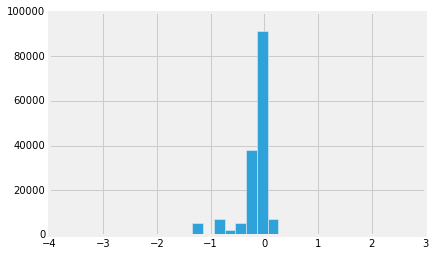

In [18]:
np.log10(final_df['avgEER']).replace(-np.inf, np.nan).hist(bins=30);

In [19]:
final_df.to_csv("final_df.csv")

<IPython.core.display.Javascript object>